In [1]:
import pandas as pd
dataset=pd.read_csv("Airmean_chennai.csv")

In [2]:
timedata=pd.DataFrame()
timedata["Date"]=dataset["Date"]
timedata["AQI"]=dataset["AQI"]
timedata

,Date,AQI
0,2015-01-01,170.088957
1,2015-01-02,170.088957
2,2015-01-03,170.088957
3,2015-01-04,170.088957
4,2015-01-05,170.088957
...,...,...
2004,2020-06-27,95.000000
2005,2020-06-28,98.000000
2006,2020-06-29,104.000000
2007,2020-06-30,110.000000


In [3]:
data=timedata["AQI"]
data_train=data.head(1500)
data_test=data.tail(509)

In [4]:
trends=['n','t','c','ct']
orders=[(0,0,0),(0,0,1),(2,0,1),(1,1,1)]
orderslist=[]
trendslist=[]
rmselist=[]
for td in trends:
    for i in orders:
        trendslist.append(td)
        orderslist.append(i)
        from statsmodels.tsa.statespace.sarimax import SARIMAX
        model = SARIMAX(data_train, order=i, seasonal_order=(0, 0, 0, 300), trend=td)
        model_fit = model.fit()
    # make prediction
        y_pred= model_fit.predict(len(data_train), len(data)-1)
        print(y_pred)
        from sklearn.metrics import mean_squared_error
        rmse=mean_squared_error(data_test,y_pred,squared=False)
        rmselist.append(rmse)
        print("Trend={}, Order={} ,rmse={}".format(td,i,rmse))

1500    0.0
1501    0.0
1502    0.0
1503    0.0
1504    0.0
       ... 
2004    0.0
2005    0.0
2006    0.0
2007    0.0
2008    0.0
Name: predicted_mean, Length: 509, dtype: float64
Trend=n, Order=(0, 0, 0) ,rmse=99.90038260190929
1500    22.87763
1501     0.00000
1502     0.00000
1503     0.00000
1504     0.00000
          ...   
2004     0.00000
2005     0.00000
2006     0.00000
2007     0.00000
2008     0.00000
Name: predicted_mean, Length: 509, dtype: float64
Trend=n, Order=(0, 0, 1) ,rmse=99.87088158238458
1500    101.286228
1501    109.713796
1502    114.682673
1503    117.609694
1504    119.331294
           ...    
2004    114.287333
2005    114.272717
2006    114.258102
2007    114.243489
2008    114.228878
Name: predicted_mean, Length: 509, dtype: float64
Trend=n, Order=(2, 0, 1) ,rmse=44.04664102419746
1500    101.526720
1501    110.106999
1502    115.174982
1503    118.168411
1504    119.936495
           ...    
2004    122.487709
2005    122.487709
2006    122.487709
2007

C:\Users\Madhu\Anaconda3\envs\ML\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


1500     99.731902
1501    106.799837
1502    110.811597
1503    113.170449
1504    114.631658
           ...    
2004    125.801290
2005    125.801290
2006    125.801290
2007    125.801290
2008    125.801290
Name: predicted_mean, Length: 509, dtype: float64
Trend=c, Order=(2, 0, 1) ,rmse=49.13705256245619
1500    100.929145
1501    109.154504
1502    114.005786
1503    116.861132
1504    118.535781
           ...    
2004    103.346294
2005    103.310962
2006    103.275630
2007    103.240298
2008    103.204966
Name: predicted_mean, Length: 509, dtype: float64
Trend=c, Order=(1, 1, 1) ,rmse=40.656125300089215
1500    91.569963
1501    91.523941
1502    91.477918
1503    91.431895
1504    91.385872
          ...    
2004    68.374403
2005    68.328380
2006    68.282357
2007    68.236334
2008    68.190312
Name: predicted_mean, Length: 509, dtype: float64
Trend=ct, Order=(0, 0, 0) ,rmse=38.05510815234774
1500    83.705088
1501    92.530728
1502    92.486731
1503    92.442734
1504    92.39

In [5]:
rmselist

[99.90038260190929,
 99.87088158238458,
 44.04664102419746,
 47.08194856635577,
 116.6687585456882,
 116.51143699975438,
 56.69449470018066,
 42.23830357169178,
 49.478907661980706,
 49.44435137980832,
 49.13705256245619,
 40.656125300089215,
 38.05510815234774,
 37.57115744458168,
 38.24077079890859,
 83.17349041264376]

In [6]:
result=pd.DataFrame()
result.insert(0,"Trend",trendslist)
result.insert(1,"Order",orderslist)
result.insert(2, "Order_Name", [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], True)
result.insert(3,"RMSE",rmselist)
result

,Trend,Order,Order_Name,RMSE
0,n,"(0, 0, 0)",1,99.900383
1,n,"(0, 0, 1)",2,99.870882
2,n,"(2, 0, 1)",3,44.046641
3,n,"(1, 1, 1)",4,47.081949
4,t,"(0, 0, 0)",5,116.668759
5,t,"(0, 0, 1)",6,116.511437
6,t,"(2, 0, 1)",7,56.694495
7,t,"(1, 1, 1)",8,42.238304
8,c,"(0, 0, 0)",9,49.478908
9,c,"(0, 0, 1)",10,49.444351


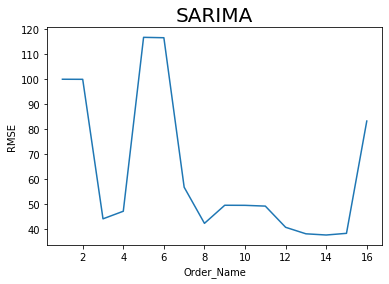

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
#plot the graph using line plot
sns.lineplot(x = 'Order_Name', y = 'RMSE', data = result)
plt.title("SARIMA", fontsize=20)
# Show the plot
plt.show()